In [333]:
# Ref: https://www.kaggle.com/code/abhishekyadav475/stock-price-prediction-model/notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [334]:
data = pd.read_csv("prices-split-adjusted.csv")
df = pd.DataFrame(data)

In [335]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


# EDA 

In [336]:
df.tail(5)

,date,symbol,open,close,low,high,volume
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0
851263,2016-12-30,FTV,54.200001,53.630001,53.389999,54.480000,705100.0


In [337]:
df.isna().any()

date      False
symbol    False
open      False
close     False
low       False
high      False
volume    False
dtype: bool

In [338]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


<AxesSubplot:>

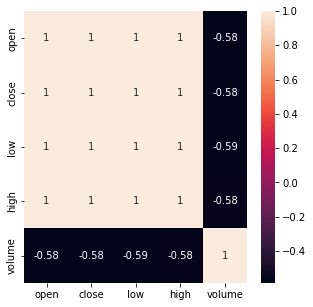

In [339]:
df = df[df['symbol']=='GOOG']   # Choosin stock values for some company 
cormap = df.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cormap, annot = True)

In [340]:
px.line(df,x="date",y=["open","close"],title="Open and close prices of Google stocks")

In [341]:
px.line(df,x="date",y=["high","low"],title="High and low prices of Google stocks")

In [342]:
def get_corelated_col(cor_dat, threshold): 
  # Cor_data to be column along which corelation to be measured 
  #Threshold be the value above which of corelation to considered
  feature=[]
  value=[]

  for i ,index in enumerate(cor_dat.index):
    if abs(cor_dat[index]) > threshold:
      feature.append(index)
      value.append(cor_dat[index])

  df = pd.DataFrame(data = value, index = feature, columns=['corr value'])
  return df

In [343]:
top_corelated_values = get_corelated_col(cormap['close'], 0.60)
top_corelated_values

,corr value
open,0.999487
close,1.000000
low,0.999802
high,0.999731


In [344]:
df = df[top_corelated_values.index]
df.head()

,open,close,low,high
439,312.304948,312.205308,310.955001,313.580158
907,312.419511,310.830459,309.610028,312.748278
1375,311.761979,302.994813,302.048370,311.761979
1843,303.562685,295.941242,295.218951,303.861575
2311,294.895159,299.886470,293.455551,300.499172


In [345]:
df.shape

(1762, 4)

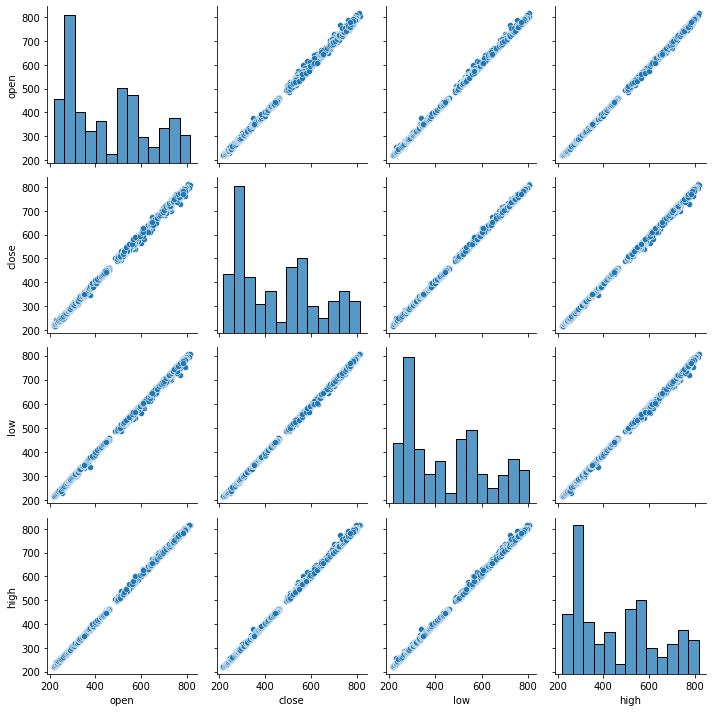

In [346]:
sns.pairplot(df)
plt.tight_layout()

In [347]:
X = df.drop(['close'], axis=1)
y = df['close']

In [348]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,open,low,high
0,0.157047,0.161167,0.156390
1,0.157238,0.158884,0.154995
2,0.156140,0.146049,0.153341
3,0.142436,0.134457,0.140094
4,0.127950,0.131464,0.134455


In [349]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

In [350]:
from sklearn.linear_model import LinearRegression

# model training

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [351]:
y_pred_1 = model_1.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1})
pred_df.head()

,Actual,Predicted
675307,633.729980,636.500120
675804,660.780029,662.346157
676301,659.559998,656.526017
676798,656.450012,657.754451
677295,657.119995,657.345003


In [352]:
from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.9946628850371857


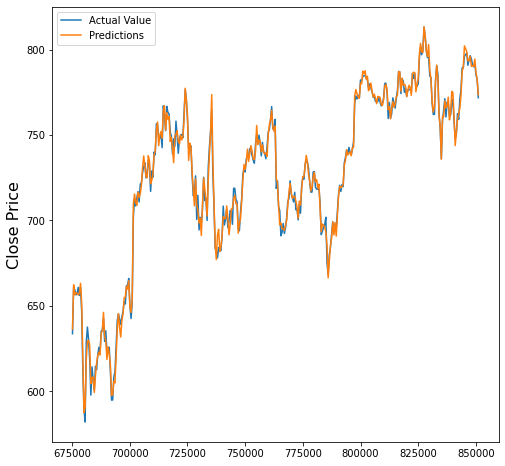

In [353]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

# Now let's try ANN

---



In [354]:
from keras.models import Sequential
from keras.layers import Dense

def regressor(inp_dim):
    
    model = Sequential()
    
    model.add(Dense(20, input_dim=inp_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(25, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [355]:
model_2 = regressor(inp_dim=3)
model_2.fit(X_train, y_train, epochs=70, verbose=0, validation_split=0.25)

In [356]:
y_pred_2 = model_2.predict(X_test)
y_pred_2.shape

12/12 [==============================] - 0s 2ms/step


(353, 1)

In [357]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2.flatten()})
pred_df.head()

,Actual,Predicted
675307,633.729980,638.030212
675804,660.780029,666.069885
676301,659.559998,660.070557
676798,656.450012,658.473022
677295,657.119995,655.843567


In [358]:
from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
Acc.append(r2_score(y_test, y_pred_2))

Accuracy score of the predictions: 0.9876753934253607


## CNN

---



In [359]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

def reg():
    
    model = Sequential()
    
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', 
                     input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())
    
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [360]:
model_3 = reg()
history = model_3.fit(X_train, y_train, epochs=30, verbose=0, validation_split=0.2)

In [361]:
model_3.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_63 (Conv1D)          (None, 3, 32)             128       
                                                                 
 conv1d_64 (Conv1D)          (None, 3, 64)             6208      
                                                                 
 conv1d_65 (Conv1D)          (None, 3, 128)            41088     
                                                                 
 flatten_21 (Flatten)        (None, 384)               0         
                                                                 
 dense_91 (Dense)            (None, 50)                19250     
                                                                 
 dense_92 (Dense)            (None, 20)                1020      
                                                                 
 dense_93 (Dense)            (None, 1)               

In [362]:
y_pred_3 = model_3.predict(X_test)

12/12 [==============================] - 0s 2ms/step


In [363]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3.flatten()})
pred_df.head()

,Actual,Predicted
675307,633.729980,639.081299
675804,660.780029,667.062927
676301,659.559998,661.259949
676798,656.450012,659.926392
677295,657.119995,657.690552


In [ ]:
rmse = math.sqrt(mean_squared_error(y_test, y_pred_3))

In [364]:
from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_3)))
Acc.append(r2_score(y_test, y_pred_3))

Accuracy score of the predictions: 0.9853316565504987


In [365]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


dict_keys(['loss', 'val_loss'])


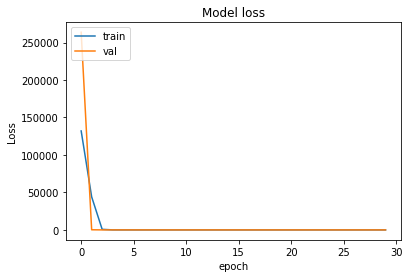

In [366]:
from matplotlib import pyplot as plt
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

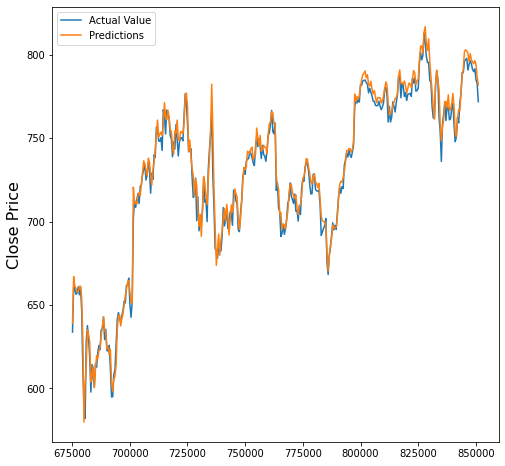

In [367]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

In [368]:
Acc

[0.9946628850371857, 0.9876753934253607, 0.9853316565504987]

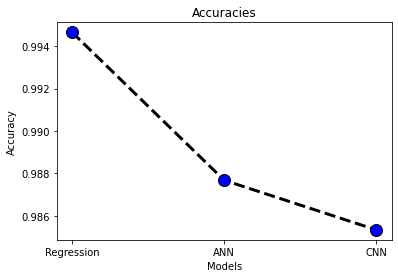

In [369]:
plt.plot(range(3), Acc, color='black', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(3), ['Regression', 'ANN', 'CNN'])
plt.show()

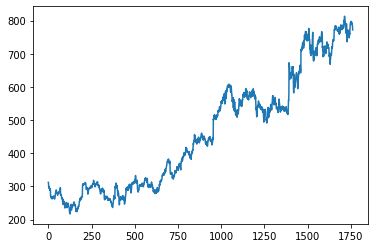

In [370]:
close = df.reset_index()['close']
plt.plot(close)
plt.show()

In [371]:
time_step = 10
X, y = [], []

# Track close for 10 steps and store in X
# and then store next in $y$. 

for i in range(len(close)-time_step-1):
    X.append(close[i:(i+time_step)])
    y.append(close[(i+time_step)])

X = np.array(X)
y = np.array(y)

In [372]:
from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)
#pd.DataFrame(X).head()

## Predict the stock price 

In [373]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

In [374]:
from tensorflow.keras.layers import LSTM

def Reg():
    model = Sequential()
    
    model.add(LSTM(70, return_sequences=True, input_shape=(timestep,1)))
    model.add(LSTM(70, return_sequences=True))
    model.add(LSTM(70))
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [375]:
model_1 = reg()
model_1.fit(X_train, y_train, epochs=50, verbose=0, validation_split=0.2)

In [376]:
y_pred_1 = model_1.predict(X_test)

11/11 [==============================] - 0s 3ms/step


In [377]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1.flatten()})
pred_df.head()

,Actual,Predicted
0,660.780029,637.124512
1,659.559998,650.537720
2,656.450012,656.112000
3,657.119995,658.198303
4,660.869995,658.499695


In [378]:
print("R2 score: {0}".format(r2_score(y_test, y_pred_1)))
# 0.8496540075024642
# 0.8103853858771626 (without scaling (ws) !)
# 0.8360219566395609 (ws, 2nd run)
# 0.8664905962623759 (ws, 3rd run)

Accuracy score of the predictions: 0.9474421984125806


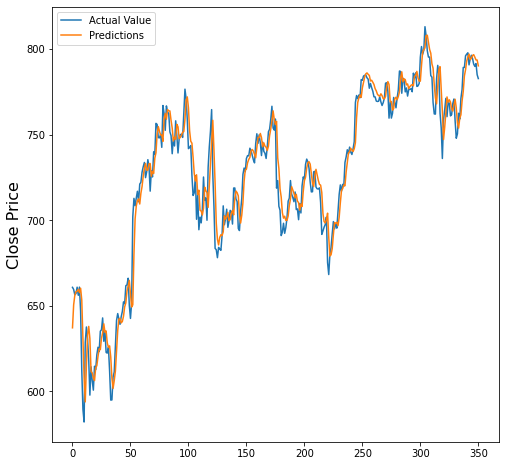

In [379]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

In [383]:
import math
from sklearn.metrics import mean_squared_error, r2_score
rmse = math.sqrt(mean_squared_error(y_test, y_pred_1))
rmse

11.494990272363724

https://machinelearningmastery.com/randomness-in-machine-learning/